In [1]:
import keras 

In [2]:
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.optimizers import Adam, SGD
from keras.layers import Input, Flatten, Dense, Dropout, Conv2D, MaxPooling2D
from keras.models import Model

from tensorflow.keras import initializers

import math

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
NUM_CLASSES = 10

In [5]:
X_train = X_train.reshape((X_train.shape[0],28,28,1))
X_test = X_test.reshape((X_test.shape[0],28,28,1))

X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

In [6]:
batch_size = 100
num_epochs_1 = int(math.ceil(10000 / ( X_train.shape[0]/batch_size)))
num_epochs_2 = int(math.ceil(20000 / ( X_train.shape[0]/batch_size)))

<b>Model 1</b>

In [7]:
input_layer = Input(shape=(28,28,1))

x = Flatten()(input_layer)

output_layer = Dense(units = NUM_CLASSES, activation='softmax')(x)

In [8]:
model1 = Model(input_layer, output_layer)

In [9]:
model1.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [10]:
opt = SGD(learning_rate=0.5)

model1.compile(
    loss='categorical_crossentropy', 
    optimizer=opt,
    metrics=['accuracy'])

In [11]:
model1_hist = model1.fit(
    X_train, 
    y_train, 
    validation_data=(X_test, y_test),
    batch_size=batch_size, 
    epochs=num_epochs_1)

Epoch 1/17
600/600 [==============================] - 2s 3ms/step - loss: 0.3935 - accuracy: 0.8879 - val_loss: 0.3011 - val_accuracy: 0.9135
Epoch 2/17
600/600 [==============================] - 1s 2ms/step - loss: 0.3059 - accuracy: 0.9132 - val_loss: 0.2852 - val_accuracy: 0.9218
Epoch 3/17
600/600 [==============================] - 1s 2ms/step - loss: 0.2928 - accuracy: 0.9184 - val_loss: 0.2971 - val_accuracy: 0.9149
Epoch 4/17
600/600 [==============================] - 1s 2ms/step - loss: 0.2847 - accuracy: 0.9203 - val_loss: 0.2838 - val_accuracy: 0.9199
Epoch 5/17
600/600 [==============================] - 1s 2ms/step - loss: 0.2788 - accuracy: 0.9224 - val_loss: 0.2753 - val_accuracy: 0.9213
Epoch 6/17
600/600 [==============================] - 1s 2ms/step - loss: 0.2759 - accuracy: 0.9230 - val_loss: 0.2779 - val_accuracy: 0.9214
Epoch 7/17
600/600 [==============================] - 1s 2ms/step - loss: 0.2718 - accuracy: 0.9240 - val_loss: 0.2727 - val_accuracy: 0.9243
Epoch 

<b> Model 2</b>

In [13]:
input_layer = Input(shape=(28,28,1))

x = Flatten()(input_layer)

x = Dense(
    units=1500,
    kernel_initializer=initializers.TruncatedNormal(mean=0, stddev=0.01),
    bias_initializer=initializers.Constant(value=0.1),
    activation='relu')(x)

x = Dense(
    units=1500,
    kernel_initializer=initializers.TruncatedNormal(mean=0, stddev=0.01),
    bias_initializer=initializers.Constant(value=0.1),
    activation='relu')(x)

x = Dense(
    units=1500,
    kernel_initializer=initializers.TruncatedNormal(mean=0, stddev=0.01),
    bias_initializer=initializers.Constant(value=0.1),
    activation='relu')(x)

output_layer = Dense(
    units = NUM_CLASSES, 
    activation='softmax',
    kernel_initializer=initializers.TruncatedNormal(mean=0, stddev=0.01),
    bias_initializer=initializers.Constant(value=0.1))(x)

In [14]:
model2 = Model(input_layer, output_layer)
model2.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1500)              1177500   
_________________________________________________________________
dense_2 (Dense)              (None, 1500)              2251500   
_________________________________________________________________
dense_3 (Dense)              (None, 1500)              2251500   
_________________________________________________________________
dense_4 (Dense)              (None, 10)                15010     
Total params: 5,695,510
Trainable params: 5,695,510
Non-trainable params: 0
_________________________________________________

In [15]:
opt_adam = Adam(learning_rate=1e-3, beta_1=0.9, beta_2=0.999, epsilon=1e-8)

model2.compile(
    loss='categorical_crossentropy', 
    optimizer=opt_adam,
    metrics=['accuracy'])

In [16]:
model2_hist = model2.fit(
    X_train, 
    y_train, 
    validation_data=(X_test, y_test),
    batch_size=batch_size, 
    epochs=num_epochs_2)

Epoch 1/34
600/600 [==============================] - 4s 7ms/step - loss: 0.2439 - accuracy: 0.9245 - val_loss: 0.1472 - val_accuracy: 0.9549
Epoch 2/34
600/600 [==============================] - 4s 7ms/step - loss: 0.0934 - accuracy: 0.9719 - val_loss: 0.0907 - val_accuracy: 0.9736
Epoch 3/34
600/600 [==============================] - 4s 6ms/step - loss: 0.0651 - accuracy: 0.9800 - val_loss: 0.0776 - val_accuracy: 0.9770
Epoch 4/34
600/600 [==============================] - 4s 7ms/step - loss: 0.0508 - accuracy: 0.9846 - val_loss: 0.0896 - val_accuracy: 0.9722
Epoch 5/34
600/600 [==============================] - 4s 7ms/step - loss: 0.0403 - accuracy: 0.9879 - val_loss: 0.0812 - val_accuracy: 0.9783
Epoch 6/34
600/600 [==============================] - 4s 6ms/step - loss: 0.0355 - accuracy: 0.9894 - val_loss: 0.0863 - val_accuracy: 0.9779
Epoch 7/34
600/600 [==============================] - 4s 6ms/step - loss: 0.0308 - accuracy: 0.9903 - val_loss: 0.0659 - val_accuracy: 0.9829
Epoch 

<b> Model 3 </b>

In [17]:
input_layer = Input(shape=(28,28,1))

x = Flatten()(input_layer)

x = Dense(
    units=1500,
    kernel_initializer=initializers.TruncatedNormal(mean=0, stddev=0.01),
    bias_initializer=initializers.Constant(value=0.1),
    activation='relu')(x)

x = Dropout(rate=0.5)(x)

x = Dense(
    units=1500,
    kernel_initializer=initializers.TruncatedNormal(mean=0, stddev=0.01),
    bias_initializer=initializers.Constant(value=0.1),
    activation='relu')(x)

x = Dropout(rate=0.5)(x)

x = Dense(
    units=1500,
    kernel_initializer=initializers.TruncatedNormal(mean=0, stddev=0.01),
    bias_initializer=initializers.Constant(value=0.1),
    activation='relu')(x)

x = Dropout(rate=0.5)(x)

output_layer = Dense(
    units = NUM_CLASSES, 
    activation='softmax',
    kernel_initializer=initializers.TruncatedNormal(mean=0, stddev=0.01),
    bias_initializer=initializers.Constant(value=0.1))(x)

In [18]:
model3 = Model(input_layer, output_layer)
model3.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 1500)              1177500   
_________________________________________________________________
dropout (Dropout)            (None, 1500)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 1500)              2251500   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1500)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 1500)              2251

In [19]:
opt_adam = Adam(learning_rate=1e-3, beta_1=0.9, beta_2=0.999, epsilon=1e-8)

model3.compile(
    loss='categorical_crossentropy', 
    optimizer=opt_adam,
    metrics=['accuracy'])

In [20]:
model3_hist = model3.fit(
    X_train, 
    y_train, 
    validation_data=(X_test, y_test),
    batch_size=batch_size, 
    epochs=num_epochs_2)

Epoch 1/34
600/600 [==============================] - 4s 7ms/step - loss: 0.3036 - accuracy: 0.9044 - val_loss: 0.1264 - val_accuracy: 0.9615
Epoch 2/34
600/600 [==============================] - 4s 7ms/step - loss: 0.1519 - accuracy: 0.9560 - val_loss: 0.0984 - val_accuracy: 0.9703
Epoch 3/34
600/600 [==============================] - 4s 7ms/step - loss: 0.1291 - accuracy: 0.9627 - val_loss: 0.0904 - val_accuracy: 0.9751
Epoch 4/34
600/600 [==============================] - 4s 7ms/step - loss: 0.1120 - accuracy: 0.9675 - val_loss: 0.0796 - val_accuracy: 0.9783
Epoch 5/34
600/600 [==============================] - 4s 7ms/step - loss: 0.1057 - accuracy: 0.9698 - val_loss: 0.0761 - val_accuracy: 0.9778
Epoch 6/34
600/600 [==============================] - 4s 7ms/step - loss: 0.0966 - accuracy: 0.9723 - val_loss: 0.0811 - val_accuracy: 0.9786
Epoch 7/34
600/600 [==============================] - 4s 7ms/step - loss: 0.0947 - accuracy: 0.9737 - val_loss: 0.0711 - val_accuracy: 0.9810
Epoch 

<b> Model 4 </b>

In [21]:
input_layer = Input(shape=(28,28,1))

x = Conv2D(
    filters=32,
    kernel_size = 5, 
    strides = 1, 
    padding='same',
    kernel_initializer=initializers.TruncatedNormal(mean=0, stddev=0.01),
    bias_initializer=initializers.Constant(value=0.1))(input_layer)

x = MaxPooling2D(
    pool_size=2,
    strides=2)(x)

x = Conv2D(
    filters=64,
    kernel_size = 5, 
    strides = 1, 
    padding='same',
    kernel_initializer=initializers.TruncatedNormal(mean=0, stddev=0.01),
    bias_initializer=initializers.Constant(value=0.1))(x)

x = MaxPooling2D(
    pool_size=2,
    strides=2)(x)

x = Flatten()(x)

output_layer = Dense(
    units = NUM_CLASSES, 
    activation='softmax',
    kernel_initializer=initializers.TruncatedNormal(mean=0, stddev=0.01),
    bias_initializer=initializers.Constant(value=0.1))(x)

In [22]:
model4 = Model(input_layer, output_layer)
model4.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                3137

In [23]:
opt_adam = Adam(learning_rate=1e-3, beta_1=0.9, beta_2=0.999, epsilon=1e-8)

model4.compile(
    loss='categorical_crossentropy', 
    optimizer=opt_adam,
    metrics=['accuracy'])

In [24]:
model4_hist = model4.fit(
    X_train, 
    y_train, 
    validation_data=(X_test, y_test),
    batch_size=batch_size, 
    epochs=num_epochs_2)

Epoch 1/34
600/600 [==============================] - 5s 9ms/step - loss: 0.3001 - accuracy: 0.9035 - val_loss: 0.0840 - val_accuracy: 0.9742
Epoch 2/34
600/600 [==============================] - 5s 9ms/step - loss: 0.0729 - accuracy: 0.9777 - val_loss: 0.0545 - val_accuracy: 0.9822
Epoch 3/34
600/600 [==============================] - 5s 9ms/step - loss: 0.0542 - accuracy: 0.9829 - val_loss: 0.0544 - val_accuracy: 0.9824
Epoch 4/34
600/600 [==============================] - 5s 9ms/step - loss: 0.0462 - accuracy: 0.9855 - val_loss: 0.0441 - val_accuracy: 0.9868
Epoch 5/34
600/600 [==============================] - 5s 9ms/step - loss: 0.0398 - accuracy: 0.9873 - val_loss: 0.0456 - val_accuracy: 0.9857
Epoch 6/34
600/600 [==============================] - 5s 9ms/step - loss: 0.0353 - accuracy: 0.9890 - val_loss: 0.0651 - val_accuracy: 0.9801
Epoch 7/34
600/600 [==============================] - 5s 9ms/step - loss: 0.0298 - accuracy: 0.9901 - val_loss: 0.0651 - val_accuracy: 0.9803
Epoch 

In [28]:
model1_hist.history

{'loss': [0.3935324549674988,
  0.3058997392654419,
  0.29276207089424133,
  0.2847037613391876,
  0.27880218625068665,
  0.2759210467338562,
  0.27183958888053894,
  0.2703404724597931,
  0.26782795786857605,
  0.26596522331237793,
  0.2646668255329132,
  0.2625960409641266,
  0.2615322768688202,
  0.26073792576789856,
  0.260113924741745,
  0.25845545530319214,
  0.25779664516448975],
 'accuracy': [0.8878833055496216,
  0.9131500124931335,
  0.9183833599090576,
  0.920283317565918,
  0.9223999977111816,
  0.9230166673660278,
  0.9240000247955322,
  0.9235833287239075,
  0.925849974155426,
  0.9255333542823792,
  0.9257166385650635,
  0.9268500208854675,
  0.9268500208854675,
  0.9269833564758301,
  0.9272666573524475,
  0.9272333383560181,
  0.928600013256073],
 'val_loss': [0.3010881245136261,
  0.28515172004699707,
  0.2970762550830841,
  0.2838123142719269,
  0.27534300088882446,
  0.2778998017311096,
  0.2727106809616089,
  0.2714384198188782,
  0.2782757580280304,
  0.2775551676

In [33]:
import matplotlib.pyplot as plt
import numpy as np

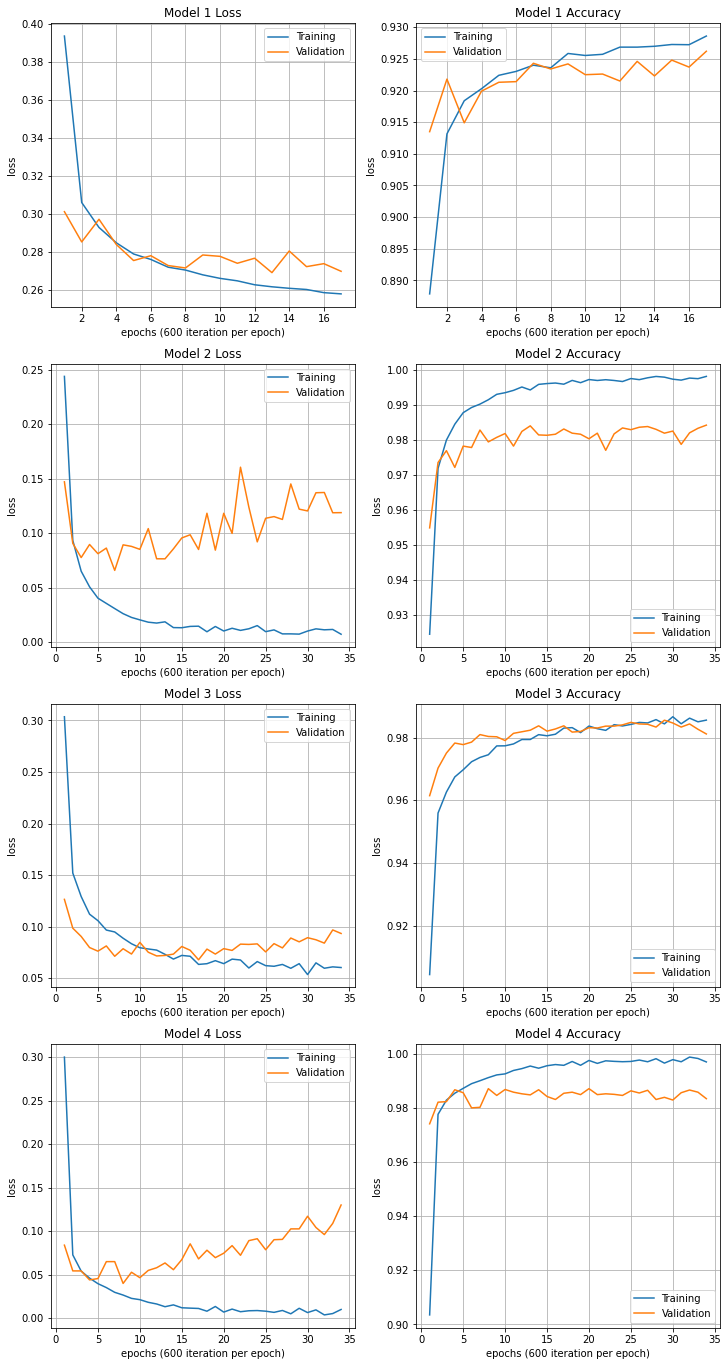

In [54]:
fig,axs = plt.subplots(4,2, figsize=(12,24))

x = np.arange(1,len(model1_hist.history['loss'])+1,1)
axs[0,0].set_title('Model 1 Loss')
axs[0,0].plot(x, model1_hist.history['loss'], label='Training')
axs[0,0].plot(x, model1_hist.history['val_loss'], label='Validation')
axs[0,0].set_xlabel('epochs (600 iteration per epoch)')
axs[0,0].set_ylabel('loss')
axs[0,0].legend()
axs[0,0].grid()

axs[0,1].set_title('Model 1 Accuracy')
axs[0,1].plot(x, model1_hist.history['accuracy'], label='Training')
axs[0,1].plot(x, model1_hist.history['val_accuracy'], label='Validation')
axs[0,1].set_xlabel('epochs (600 iteration per epoch)')
axs[0,1].set_ylabel('loss')
axs[0,1].legend()
axs[0,1].grid()

x = np.arange(1,len(model2_hist.history['loss'])+1,1)
axs[1,0].set_title('Model 2 Loss')
axs[1,0].plot(x, model2_hist.history['loss'], label='Training')
axs[1,0].plot(x, model2_hist.history['val_loss'], label='Validation')
axs[1,0].set_xlabel('epochs (600 iteration per epoch)')
axs[1,0].set_ylabel('loss')
axs[1,0].legend()
axs[1,0].grid()

axs[1,1].set_title('Model 2 Accuracy')
axs[1,1].plot(x, model2_hist.history['accuracy'], label='Training')
axs[1,1].plot(x, model2_hist.history['val_accuracy'], label='Validation')
axs[1,1].set_xlabel('epochs (600 iteration per epoch)')
axs[1,1].set_ylabel('loss')
axs[1,1].legend()
axs[1,1].grid()

axs[2,0].set_title('Model 3 Loss')
axs[2,0].plot(x, model3_hist.history['loss'], label='Training')
axs[2,0].plot(x, model3_hist.history['val_loss'], label='Validation')
axs[2,0].set_xlabel('epochs (600 iteration per epoch)')
axs[2,0].set_ylabel('loss')
axs[2,0].legend()
axs[2,0].grid()

axs[2,1].set_title('Model 3 Accuracy')
axs[2,1].plot(x, model3_hist.history['accuracy'], label='Training')
axs[2,1].plot(x, model3_hist.history['val_accuracy'], label='Validation')
axs[2,1].set_xlabel('epochs (600 iteration per epoch)')
axs[2,1].set_ylabel('loss')
axs[2,1].legend()
axs[2,1].grid()

axs[3,0].set_title('Model 4 Loss')
axs[3,0].plot(x, model4_hist.history['loss'], label='Training')
axs[3,0].plot(x, model4_hist.history['val_loss'], label='Validation')
axs[3,0].set_xlabel('epochs (600 iteration per epoch)')
axs[3,0].set_ylabel('loss')
axs[3,0].legend()
axs[3,0].grid()

axs[3,1].set_title('Model 4 Accuracy')
axs[3,1].plot(x, model4_hist.history['accuracy'], label='Training')
axs[3,1].plot(x, model4_hist.history['val_accuracy'], label='Validation')
axs[3,1].set_xlabel('epochs (600 iteration per epoch)')
axs[3,1].set_ylabel('loss')
axs[3,1].legend()
axs[3,1].grid()